In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential, Model, load_model
from keras import backend as K

import tensorflow as tf

import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import aparent.visualization as vis

from aparent.predictor import *

import urllib
import urllib.request
import pickle
from time import sleep


Using TensorFlow backend.


spearman r = 0.44
p-value = 0.00054311
n = 58


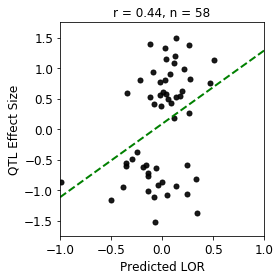

In [4]:
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import average_precision_score
import random

save_figs = True

snp_pred_df = pd.read_csv("predictions/apa_elife_data/polyadb_elife_SNPs_polyapred_shifted.csv", sep='\t')
snp_pred_df['snp_pos'] = snp_pred_df['rel_snp_pos'] - 105

from scipy.stats import spearmanr, pearsonr

filtered_df = snp_pred_df.query("snp_pos >= 20 and snp_pos < 126 and pas != -1 and p_value < 0.05").copy().reset_index(drop=True)

r_val, p_val = spearmanr(filtered_df['delta_isoform_logodds'], filtered_df['slope'])

print("spearman r = " + str(round(r_val, 3)))
print("p-value = " + str(round(p_val, 8)))

print("n = " + str(len(filtered_df)))

x_min = -1.
x_max = 1.
keep_index = (filtered_df['delta_isoform_logodds'].values > x_min) & (filtered_df['delta_isoform_logodds'].values <= x_max)

m, b = np.polyfit(filtered_df['delta_isoform_logodds'].values[keep_index], filtered_df['slope'].values[keep_index], 1)

f = plt.figure(figsize=(4, 4))

plt.scatter(filtered_df['delta_isoform_logodds'].values[keep_index], filtered_df['slope'][keep_index], color='black', s=25, alpha=0.9)
plt.plot([x_min, x_max], [x_min * m + b, x_max * m + b], linewidth=2, color='green', linestyle='--')

plt.xlim(-1., 1.)
plt.ylim(-1.75, 1.75)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("QTL Effect Size", fontsize=12)

plt.title("r = " + str(round(r_val, 2)) + ", n = " + str(len(filtered_df)), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig("elife_apaqtl_pred_polyapred_scatter.png", dpi=150, transparent=True)
    plt.savefig("elife_apaqtl_pred_polyapred_scatter.eps")

plt.show()
